## Loan Portfolio Analysis
##### This project presents a comprehensive analysis of a consumer loan dataset comprising 38,576 records, each representing an individual loan issued by a financial institution. The dataset encapsulates a wide range of borrower attributes, loan characteristics, and repayment behaviors, offering rich potential for insights into credit risk, borrower segmentation, and financial performance.
### 🎯 Objective
##### The primary goal is to explore patterns and relationships across borrower demographics, loan terms, and repayment outcomes to:
##### - Identify key drivers of loan performance and default risk
##### - Benchmark repayment behavior across grades, terms, and income levels
##### - Develop actionable insights for underwriting, portfolio management, and customer targeting



### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
import os
import warnings
%matplotlib inline

#### - NumPy, used for numerical operations like arrays, statistics, and mathematical functions.
#### - Pandas, essential for data manipulation, cleaning, and tabular analysis
#### - Matplotlib, a core library for creating static plots such as line charts, bar graphs.
#### - Seaborn, built on Matplotlib, for cleaner and more informative statistical visualizations.
#### - Plotly Express and Plotly Offline for interactive charts like choropleths, sunbursts, and hover-enabled visuals


### Creating the dataframe and load

In [3]:
df=pd.read_excel("E:\\Project_Works\\DataSets\\financial_loan.xlsx")
df.head()

id address_state application_type emp_length              emp_title  \
0  1077430            GA       INDIVIDUAL   < 1 year                  Ryder   
1  1072053            CA       INDIVIDUAL    9 years         MKC Accounting   
2  1069243            CA       INDIVIDUAL    4 years  Chemat Technology Inc   
3  1041756            TX       INDIVIDUAL   < 1 year    barnes distribution   
4  1068350            IL       INDIVIDUAL  10+ years          J&J Steel Inc   

  grade home_ownership issue_date last_credit_pull_date last_payment_date  \
0     C           RENT 2021-02-11            2021-09-13        2021-04-13   
1     E           RENT 2021-01-01            2021-12-14        2021-01-15   
2     C           RENT 2021-01-05            2021-12-12        2021-01-09   
3     B       MORTGAGE 2021-02-25            2021-12-12        2021-03-12   
4     A       MORTGAGE 2021-01-01            2021-12-14        2021-01-15   

   ... sub_grade        term  verification_status annual_income     dti  \
0  ...        C4   60 months      Source Verified       30000.0  0.0100   
1  ...        E1   36 months      Source Verified       48000.0  0.0535   
2  ...        C5   36 months         Not Verified       50000.0  0.2088   
3  ...        B2   60 months      Source Verified       42000.0  0.0540   
4  ...        A1   36 months             Verified       83000.0  0.0231   

  installment int_rate  loan_amount  total_acc  total_payment  
0       59.83   0.1527         2500          4           1009  
1      109.43   0.1864         3000          4           3939  
2      421.65   0.1596        12000         11           3522  
3       97.06   0.1065         4500          9           4911  
4      106.53   0.0603         3500         28           3835  

[5 rows x 24 columns]

In [4]:
df.shape

(38576, 24)

##### This dataset contains 38576 rows and 24 columns

### EDA

In [5]:
df.rename(columns={"id":"Loan_id","emp_length":"Employee Tenure","emp_title":"Employer_Name","term":"Loan_term","dti":"Debit_to_income"},inplace=True)

##### Renamed certain column for better clarity

#### Checking for the null values

In [6]:
df.columns

Index(['Loan_id', 'address_state', 'application_type', 'Employee Tenure',
       'Employer_Name', 'grade', 'home_ownership', 'issue_date',
       'last_credit_pull_date', 'last_payment_date', 'loan_status',
       'next_payment_date', 'member_id', 'purpose', 'sub_grade', 'Loan_term',
       'verification_status', 'annual_income', 'Debit_to_income',
       'installment', 'int_rate', 'loan_amount', 'total_acc', 'total_payment'],
      dtype='object')

#### Dataset Overview
##### Loan_id                 -   Unique identifier for each loan record.              
##### address_state         -   U.S. state where Type of loan application the borrower resides.
##### application_type      -   Type of loan application 
##### Employee Tenure       -   Length of employment at the time of application
##### Employer_Name         -   Name of the employer
##### grade                 -   Loan quality grade assigned by the lender
##### home_ownership        -   Type of home ownership 
##### issue_date            -   Date when the loan was issued.
##### last_credit_pull_date -   Date when the borrower's credit was last pulled.
##### last_payment_date     -   Date of the most recent payment made by the borrower.
##### loan_status           -   Current status of the loan
##### next_payment_date     -   Scheduled date for the next payment.
##### member_id             -   Unique identifier for the borrower 
##### purpose               -   Purpose of the Loan
##### sub_grade             -   More granular version of grade      
##### Loan_term             -   Duration of the loan 
##### verification_status   -   Indicates whether income was verified
##### annual_income         -   Annual income of the borrower at the time of application.
##### Debit_to_income       -   Debt-to-income ratio: borrower's monthly debt payments divided by monthly income.
##### installment           -   Monthly payment amount the borrower is expected to make.
##### int_rate              -   Interest rate charged on the loan.
##### loan_amount           -   Total amount of the loan issued.
##### total_acc             -   Total number of credit accounts the borrower has.
##### total_payment         -   Total amount paid by the borrower over the life of the loan.


In [7]:
df.isnull().sum()

Loan_id                     0
address_state               0
application_type            0
Employee Tenure             0
Employer_Name            1438
grade                       0
home_ownership              0
issue_date                  0
last_credit_pull_date       0
last_payment_date           0
loan_status                 0
next_payment_date           0
member_id                   0
purpose                     0
sub_grade                   0
Loan_term                   0
verification_status         0
annual_income               0
Debit_to_income             0
installment                 0
int_rate                    0
loan_amount                 0
total_acc                   0
total_payment               0
dtype: int64

In [8]:
(1438/38576)*100


3.7277063459145583

#### The job_title column contains 1,438 missing entries, indicating that approximately 3.7% of borrowers did not provide their employer name during the loan application process.


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Loan_id                38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   Employee Tenure        38576 non-null  object        
 4   Employer_Name          37138 non-null  object        
 5   grade                  38576 non-null  object        
 6   home_ownership         38576 non-null  object        
 7   issue_date             38576 non-null  datetime64[ns]
 8   last_credit_pull_date  38576 non-null  datetime64[ns]
 9   last_payment_date      38576 non-null  datetime64[ns]
 10  loan_status            38576 non-null  object        
 11  next_payment_date      38576 non-null  datetime64[ns]
 12  member_id              38576 non-null  int64         
 13  p

In [10]:
df[df["Employer_Name"].isnull()]

Loan_id address_state application_type Employee Tenure Employer_Name  \
19     1058060            MD       INDIVIDUAL       10+ years           NaN   
21      207910            FL       INDIVIDUAL        < 1 year           NaN   
31      744344            WA       INDIVIDUAL         6 years           NaN   
239     494363            NM       INDIVIDUAL          1 year           NaN   
245     781298            TX       INDIVIDUAL         9 years           NaN   
...        ...           ...              ...             ...           ...   
38305   617250            CO       INDIVIDUAL         5 years           NaN   
38311   543406            NY       INDIVIDUAL          1 year           NaN   
38314   375077            NY       INDIVIDUAL         3 years           NaN   
38326   781758            CA       INDIVIDUAL         5 years           NaN   
38362   664374            GA       INDIVIDUAL         4 years           NaN   

      grade home_ownership issue_date last_credit_pull_date last_payment_date  \
19        D            OWN 2021-02-02            2021-05-16        2021-02-15   
21        A       MORTGAGE 2021-01-08            2021-05-16        2021-02-10   
31        B       MORTGAGE 2021-05-11            2021-05-16        2021-01-13   
239       B       MORTGAGE 2021-03-10            2021-08-11        2021-09-11   
245       B       MORTGAGE 2021-06-11            2021-05-16        2021-06-14   
...     ...            ...        ...                   ...               ...   
38305     B           RENT 2021-11-10            2021-10-13        2021-10-13   
38311     B           RENT 2021-07-10            2021-05-12        2021-04-12   
38314     B           RENT 2021-02-09            2021-12-10        2021-12-10   
38326     C           RENT 2021-06-11            2021-04-16        2021-06-14   
38362     B       MORTGAGE 2021-02-11            2021-04-12        2021-04-12   

       ... sub_grade   Loan_term  verification_status annual_income  \
19     ...        D1   36 months         Not Verified       40000.0   
21     ...        A2   36 months         Not Verified      120000.0   
31     ...        B4   36 months         Not Verified       48000.0   
239    ...        B4   36 months         Not Verified       45000.0   
245    ...        B2   36 months         Not Verified       70000.0   
...    ...       ...         ...                  ...           ...   
38305  ...        B2   36 months             Verified       48000.0   
38311  ...        B2   36 months             Verified       96000.0   
38314  ...        B4   36 months             Verified       73500.0   
38326  ...        C4   36 months             Verified       60000.0   
38362  ...        B4   36 months             Verified      108000.0   

      Debit_to_income installment int_rate  loan_amount  total_acc  \
19             0.0957      176.51   0.1629         5000         13   
21             0.0767       69.14   0.0743         2225         20   
31             0.2357      197.83   0.1149         6000         27   
239            0.1125      108.03   0.1099         3300         13   
245            0.2309      278.85   0.1114         8500         19   
...               ...         ...      ...          ...        ...   
38305          0.2110      348.69   0.0925        18000         25   
38311          0.0084      130.49   0.1075         4000         14   
38314          0.0405      497.46   0.1189        15000          9   
38326          0.2024      104.91   0.1562         3000         23   
38362          0.2211      326.16   0.1074        10000         11   

       total_payment  
19              6361  
21              2508  
31              3950  
239             3712  
245            10038  
...              ...  
38305          12545  
38311           4564  
38314          16833  
38326           3777  
38362          11053  

[1438 rows x 24 columns]

In [11]:
df["Employer_Name"].nunique()

28525

In [12]:
df.describe(include="all")

Loan_id address_state application_type Employee Tenure  \
count   3.857600e+04         38576            38576           38576   
unique           NaN            50                1              11   
top              NaN            CA       INDIVIDUAL       10+ years   
freq             NaN          6894            38576            8870   
mean    6.810371e+05           NaN              NaN             NaN   
min     5.473400e+04           NaN              NaN             NaN   
25%     5.135170e+05           NaN              NaN             NaN   
50%     6.627280e+05           NaN              NaN             NaN   
75%     8.365060e+05           NaN              NaN             NaN   
max     1.077501e+06           NaN              NaN             NaN   
std     2.113246e+05           NaN              NaN             NaN   

       Employer_Name  grade home_ownership                     issue_date  \
count          37138  38576          38576                          38576   
unique         28525      7              5                            NaN   
top          US Army      B           RENT                            NaN   
freq             135  11674          18439                            NaN   
mean             NaN    NaN            NaN  2021-07-16 02:31:35.562007040   
min              NaN    NaN            NaN            2021-01-01 00:00:00   
25%              NaN    NaN            NaN            2021-04-11 00:00:00   
50%              NaN    NaN            NaN            2021-07-11 00:00:00   
75%              NaN    NaN            NaN            2021-10-11 00:00:00   
max              NaN    NaN            NaN            2021-12-12 00:00:00   
std              NaN    NaN            NaN                            NaN   

                last_credit_pull_date              last_payment_date  ...  \
count                           38576                          38576  ...   
unique                            NaN                            NaN  ...   
top                               NaN                            NaN  ...   
freq                              NaN                            NaN  ...   
mean    2021-06-08 13:36:34.193280512  2021-06-26 09:52:08.909166080  ...   
min               2021-01-08 00:00:00            2021-01-08 00:00:00  ...   
25%               2021-04-15 00:00:00            2021-03-16 00:00:00  ...   
50%               2021-05-16 00:00:00            2021-06-14 00:00:00  ...   
75%               2021-08-13 00:00:00            2021-09-15 00:00:00  ...   
max               2022-01-20 00:00:00            2021-12-15 00:00:00  ...   
std                               NaN                            NaN  ...   

       sub_grade   Loan_term  verification_status annual_income  \
count      38576       38576                38576  3.857600e+04   
unique        35           2                    3           NaN   
top           B3   36 months         Not Verified           NaN   
freq        2834       28237                16464           NaN   
mean         NaN         NaN                  NaN  6.964454e+04   
min          NaN         NaN                  NaN  4.000000e+03   
25%          NaN         NaN                  NaN  4.150000e+04   
50%          NaN         NaN                  NaN  6.000000e+04   
75%          NaN         NaN                  NaN  8.320050e+04   
max          NaN         NaN                  NaN  6.000000e+06   
std          NaN         NaN                  NaN  6.429368e+04   

       Debit_to_income   installment      int_rate   loan_amount  \
count     38576.000000  38576.000000  38576.000000  38576.000000   
unique             NaN           NaN           NaN           NaN   
top                NaN           NaN           NaN           NaN   
freq               NaN           NaN           NaN           NaN   
mean          0.133274    326.862965      0.120488  11296.066855   
min           0.000000     15.690000      0.054200    500.000000   
25%           0.082100    168

In [13]:
df.fillna({"Employer_Name":"Not Available"},inplace=True)

##### All missing values in the Employer_Name column (1,438 entries) have been imputed with the placeholder "Not Available" to ensure consistency and facilitate downstream analysis without null-related disruptions.


In [14]:
df.duplicated().sum()

0

##### There are no duplicated records

### Total Number of loan application

In [15]:
print(f"Total number of loans : {df['Loan_id'].nunique()}")

Total number of loans : 38576


### Month to Date Loan Application

In [16]:
latest_issue_date=df["issue_date"].max()

latest_year=latest_issue_date.year
latest_month=latest_issue_date.month

mtd_df=df[(df["issue_date"].dt.year==latest_year) & (df["issue_date"].dt.month==latest_month)]

print(f"MTD loan application (for {latest_issue_date.strftime('%B %Y')}) : {mtd_df['Loan_id'].nunique()}")

MTD loan application (for December 2021) : 4314


### Total Funded Loan Amount

In [17]:
total_fund=df['loan_amount'].sum()/1000000
print("Total Funded loan amount : $ {:.2f} m".format(total_fund))

Total Funded loan amount : $ 435.76 m


### Month to date funded amount

In [18]:
mtd_total_fund=mtd_df['loan_amount'].sum()/1000000
print("Total Funded loan amount : $ {:.2f} m".format(mtd_total_fund))

Total Funded loan amount : $ 53.98 m


### Total repayment received

In [19]:
total_repayment=df['total_payment'].sum()/1000000
print("Total repayment received : $ {:.2f} m".format(total_repayment))

Total repayment received : $ 473.07 m


#### MTD total repayment received

In [20]:
mtd_total_fund_received=mtd_df['total_payment'].sum()/1000000
print("Total Funded loan amount : $ {:.2f} m".format(mtd_total_fund_received))

Total Funded loan amount : $ 58.07 m


### Average interest rate

In [21]:
avg_interest=df["int_rate"].mean()*100
print("Average interest rate : {:.2f} %".format(avg_interest))


Average interest rate : 12.05 %


### Average Debt to Income ratio

In [22]:
avg_dti=df["Debit_to_income"].mean()*100
print("Average debit to income  : {:.2f} %".format(avg_dti))

Average debit to income  : 13.33 %


### Good Loan Metrics



In [23]:
df_good_loans=df[(df["loan_status"]=="Fully Paid") | (df["loan_status"]=="Current")]
good_loan=df_good_loans['Loan_id'].nunique()
good_loan_fund=df_good_loans['loan_amount'].sum()/1000000
good_loan_repayed=df_good_loans['total_payment'].sum()/1000000

good_loan_percentage=good_loan/df['Loan_id'].count()*100

print(f"TOtal number of Good loans :{good_loan}")
print("Total Funded good loan amount : $ {:.2f} m".format(good_loan_fund))
print("Total repayment received for good loans : $ {:.2f} m".format(good_loan_repayed))
print("Good loan percentage  : {:.2f} %".format(good_loan_percentage))

TOtal number of Good loans :33243
Total Funded good loan amount : $ 370.22 m
Total repayment received for good loans : $ 435.79 m
Good loan percentage  : 86.18 %


In [24]:
df["loan_status"].unique()

array(['Charged Off', 'Fully Paid', 'Current'], dtype=object)

### Bad Loan Metrics

In [25]:
df_bad_loans=df[df["loan_status"]=="Charged Off"]
bad_loan=df_bad_loans['Loan_id'].nunique()
bad_loan_fund=df_bad_loans['loan_amount'].sum()/1000000
bad_loan_repayed=df_bad_loans['total_payment'].sum()/1000000

bad_loan_percentage=bad_loan/df['Loan_id'].count()*100

print(f"TOtal number of bad loans :{bad_loan}")
print("Total Funded good loan amount : $ {:.2f} m".format(bad_loan_fund))
print("Total repayment received for good loans : $ {:.2f} m".format(bad_loan_repayed))
print("Good loan percentage  : {:.2f} %".format(bad_loan_percentage))

TOtal number of bad loans :5333
Total Funded good loan amount : $ 65.53 m
Total repayment received for good loans : $ 37.28 m
Good loan percentage  : 13.82 %


#### Monthly trend by Issue date


In [26]:
monthly_fund=df.sort_values(by="issue_date").assign(month_name=lambda x:x["issue_date"].dt.strftime("%b %Y")).groupby("month_name",sort=False)["loan_amount"].sum().div(1000000).reset_index(name="loan_amount_million")

In [27]:
monthly_fund

month_name  loan_amount_million
0    Jan 2021            25.031650
1    Feb 2021            24.647825
2    Mar 2021            28.875700
3    Apr 2021            29.800800
4    May 2021            31.738350
5    Jun 2021            34.161475
6    Jul 2021            35.813900
7    Aug 2021            38.149600
8    Sep 2021            40.907725
9    Oct 2021            44.893800
10   Nov 2021            47.754825
11   Dec 2021            53.981425

In [28]:
plt.figure(figsize=(15,8))
plt.fill_between(monthly_fund["month_name"],monthly_fund["loan_amount_million"],color="skyblue",alpha=0.5)
plt.plot(monthly_fund["month_name"],monthly_fund["loan_amount_million"],color="blue",linewidth=2)

for i,row in monthly_fund.iterrows():
    plt.text(i,row["loan_amount_million"]+0.1,f"{row['loan_amount_million']:.2f}",ha="center",va="bottom",fontsize=9,rotation=0,color="black")


plt.xlabel("Month")
plt.ylabel("Loan Amount in million")
plt.xticks(ticks=range(len(monthly_fund)),labels=monthly_fund['month_name'],rotation=45)
plt.grid(True,linestyle="--",alpha=.6)
plt.title("Total Funded Amount By Month")
plt.tight_layout()
plt.show()

#### --Strong and Consistent Growth in Loan Funding Throughout 2021
##### -The total funded loan amount shows a steady upward trajectory from $25.03 million in January to $53.98 million in December 2021, more than doubling over the year. This reflects:
###### - 📊 Consistent month-over-month growth, with no dips or stagnation.
###### - 🚀 Accelerated funding in Q4, especially from September to December, where the monthly increase jumps from ~₹2M to over ₹6M.
###### - 🧭 Potential drivers could include seasonal demand, improved borrower eligibility, or strategic lending expansion.




### Monthly trend of repayment by issue date

In [29]:
monthly_repayment=df.sort_values(by="issue_date").assign(month_name=lambda x:x["issue_date"].dt.strftime("%b %Y")).groupby("month_name",sort=False)["total_payment"].sum().div(1000000).reset_index(name="loan_amount_million")

In [30]:
monthly_repayment

month_name  loan_amount_million
0    Jan 2021            27.578836
1    Feb 2021            27.717745
2    Mar 2021            32.264400
3    Apr 2021            32.495533
4    May 2021            33.750523
5    Jun 2021            36.164533
6    Jul 2021            38.827220
7    Aug 2021            42.682218
8    Sep 2021            43.983948
9    Oct 2021            49.399567
10   Nov 2021            50.132030
11   Dec 2021            58.074380

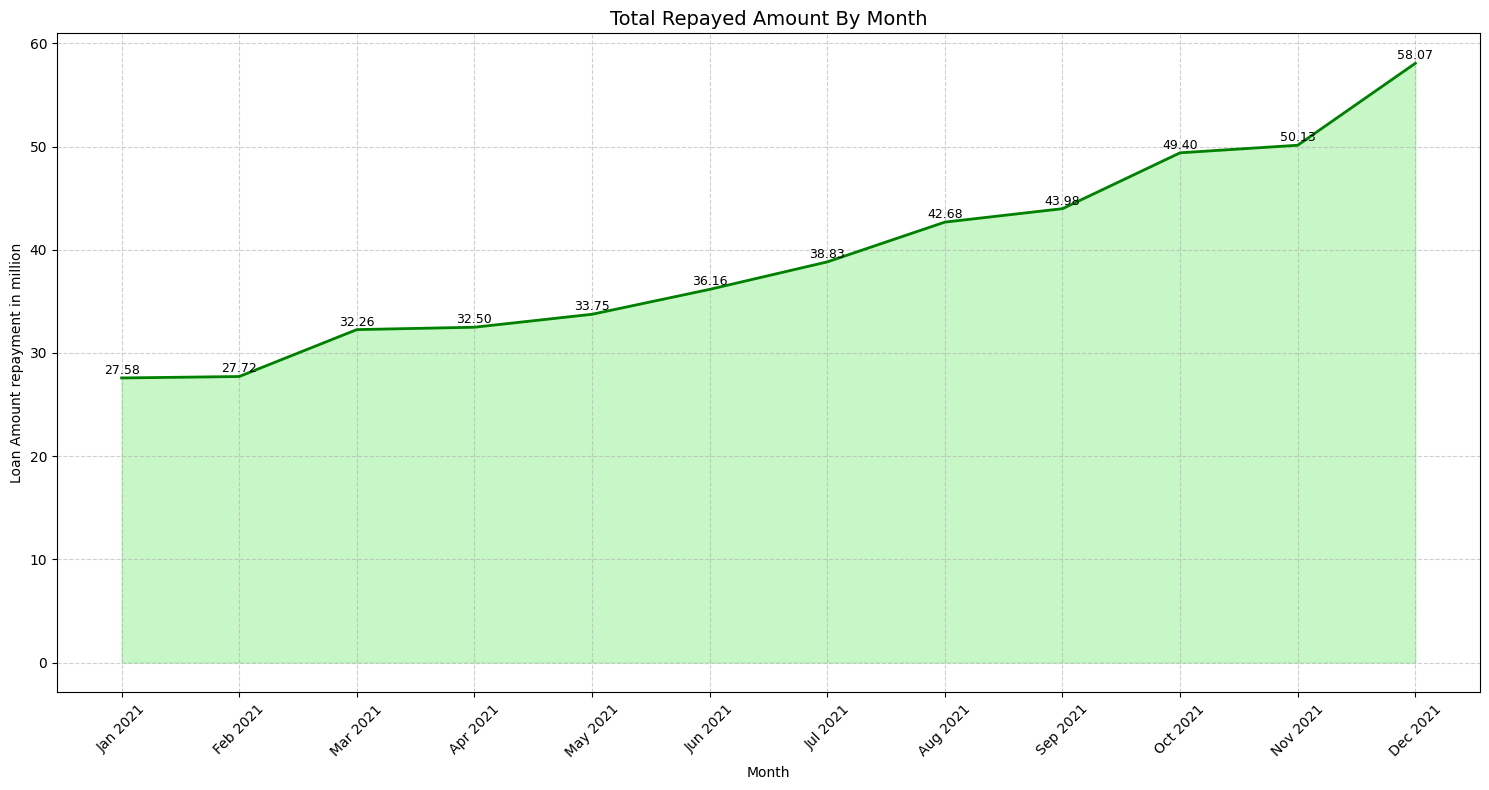

In [31]:
plt.figure(figsize=(15,8))
plt.fill_between(monthly_repayment["month_name"],monthly_repayment["loan_amount_million"],color="lightgreen",alpha=0.5)
plt.plot(monthly_repayment["month_name"],monthly_repayment["loan_amount_million"],color="green",linewidth=2)

for i,row in monthly_repayment.iterrows():
    plt.text(i,row["loan_amount_million"]+0.1,f"{row['loan_amount_million']:.2f}",ha="center",va="bottom",fontsize=9,rotation=0,color="black")


plt.xlabel("Month")
plt.ylabel("Loan Amount repayment in million")
plt.xticks(ticks=range(len(monthly_repayment)),labels=monthly_repayment['month_name'],rotation=45)
plt.grid(True,linestyle="--",alpha=.6)
plt.title("Total Repayed Amount By Month",fontsize=14)
plt.tight_layout()
plt.show()

### Loan Applications By Month

In [32]:
monthly_application=df.sort_values(by="issue_date").assign(month_name=lambda x:x["issue_date"].dt.strftime("%b %Y")).groupby("month_name",sort=False)["Loan_id"].count().reset_index(name="loan_applications")

In [33]:
monthly_application

month_name  loan_applications
0    Jan 2021               2332
1    Feb 2021               2279
2    Mar 2021               2627
3    Apr 2021               2755
4    May 2021               2911
5    Jun 2021               3184
6    Jul 2021               3366
7    Aug 2021               3441
8    Sep 2021               3536
9    Oct 2021               3796
10   Nov 2021               4035
11   Dec 2021               4314

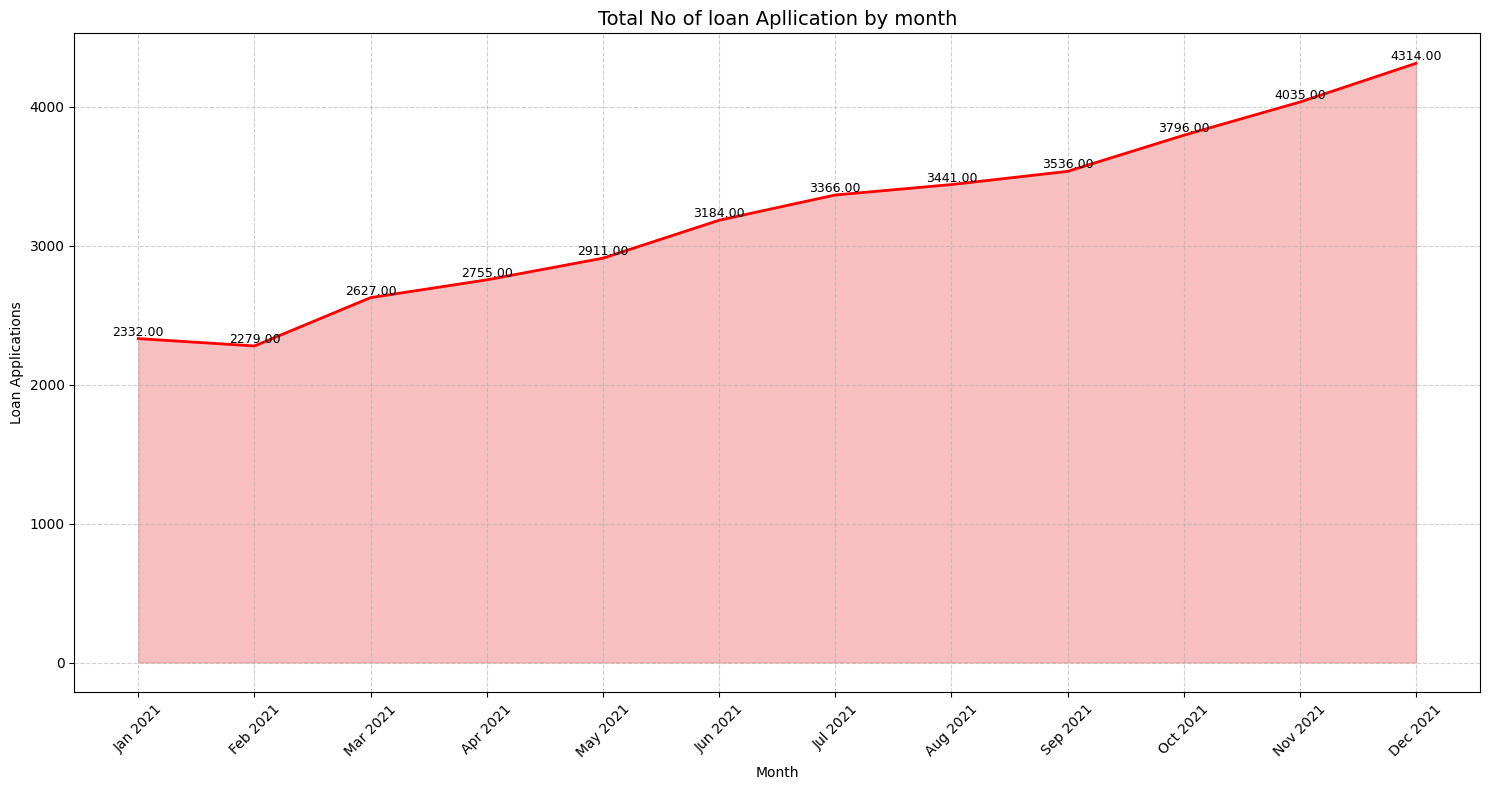

In [34]:
plt.figure(figsize=(15,8))
plt.fill_between(monthly_application["month_name"],monthly_application["loan_applications"],color="lightcoral",alpha=0.5)
plt.plot(monthly_application["month_name"],monthly_application["loan_applications"],color="red",linewidth=2)

for i,row in monthly_application.iterrows():
    plt.text(i,row["loan_applications"]+0.1,f"{row['loan_applications']:.2f}",ha="center",va="bottom",fontsize=9,rotation=0,color="black")


plt.xlabel("Month")
plt.ylabel("Loan Applications")
plt.xticks(ticks=range(len(monthly_application)),labels=monthly_application['month_name'],rotation=45)
plt.grid(True,linestyle="--",alpha=.6)
plt.title("Total No of loan Apllication by month",fontsize=14)
plt.tight_layout()
plt.show()

### Regional Analysis for States For Total Funded Amount

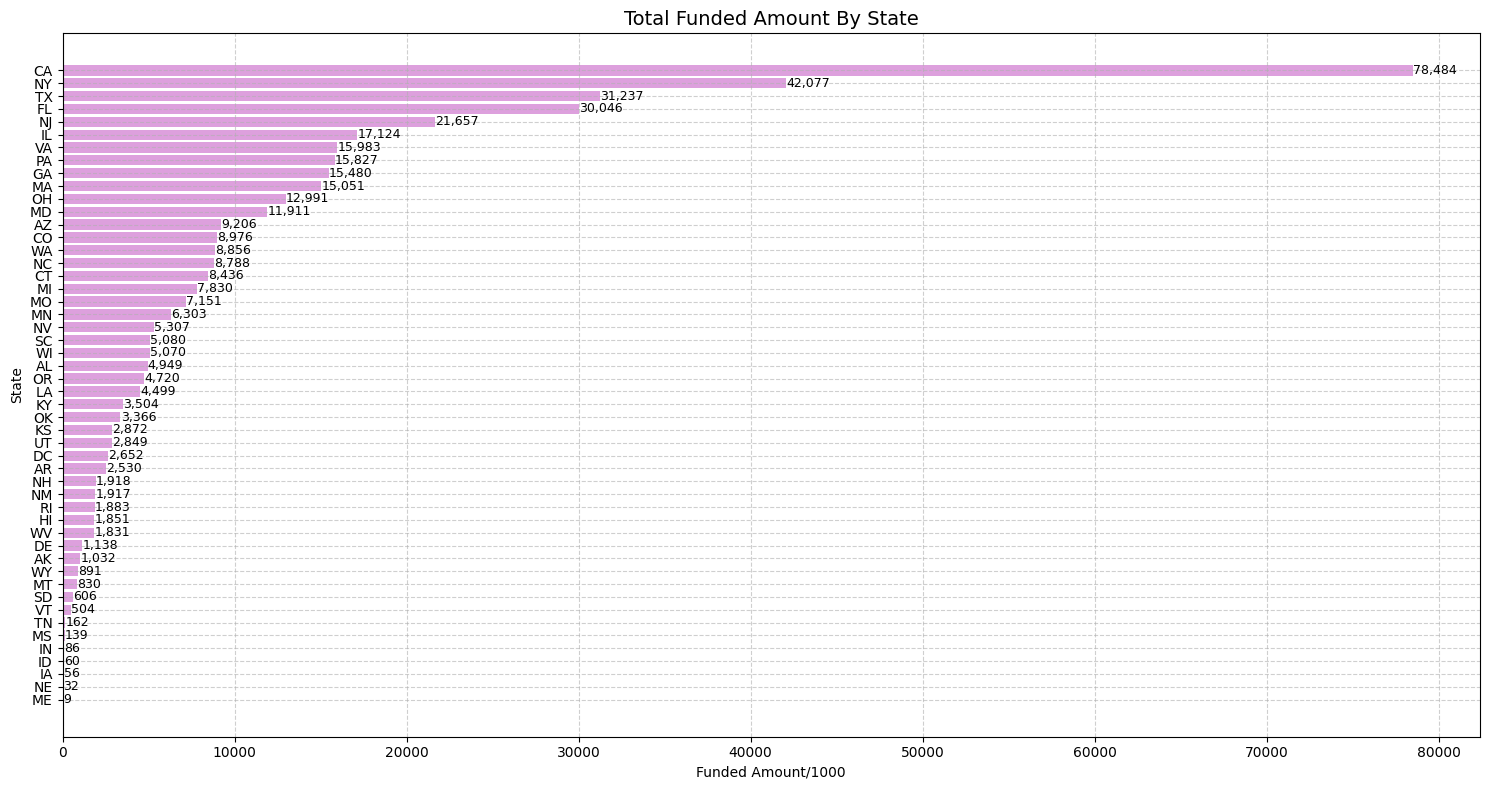

In [35]:
state_funding=df.groupby('address_state')["loan_amount"].sum().sort_values(ascending=True)
state_funding_1000=state_funding/1000

plt.figure(figsize=(15,8))
bars=plt.barh(state_funding_1000.index,state_funding_1000.values,color="plum")

for bar in bars:
    width=bar.get_width()
    plt.text(width+10,bar.get_y()+bar.get_height()/2,f"{width:,.0f}",va="center",fontsize=9)
plt.xlabel("Funded Amount/1000")
plt.ylabel("State")
plt.grid(True,linestyle="--",alpha=.6)
plt.title("Total Funded Amount By State",fontsize=14)
plt.tight_layout()
plt.show()

### Regional Analysis for States For Total Funded Amount

### Regional Analysis for States For Total Repayment

In [36]:
state_repayment=df.groupby('address_state')["total_payment"].sum().sort_values(ascending=True)
state_repayment_1000=state_repayment/1000

plt.figure(figsize=(15,8))
bars=plt.barh(state_repayment_1000.index,state_repayment_1000.values,color="springgreen")

for bar in bars:
    width=bar.get_width()
    plt.text(width+10,bar.get_y()+bar.get_height()/2,f"{width:,.0f}",va="center",fontsize=9)
plt.xlabel("Repayment Amount/1000")
plt.ylabel("State")
plt.grid(True,linestyle="--",alpha=.6)
plt.title("Total Amount Repayed By State",fontsize=14)
plt.tight_layout()
plt.show()

### Loan Term Analysis Based On Total Fund

In [37]:

plt.figure(figsize=(6,6))
term_fund=df.groupby('Loan_term')["loan_amount"].sum()/1000000
term_fund.plot(kind="pie",figsize=(8,5),autopct=lambda p:f"{p:.1f}%\n${p*sum(term_fund)/100:.1f} m",startangle=90,colors=['#023e8a', '#c1121f'],
        title="Total Funded Amount Based On Loan Term",
        explode=(0,.2),
        shadow=True,
        wedgeprops=dict(width=0.7, edgecolor='white', linewidth=1) )

<Axes: title={'center': 'Total Funded Amount Based On Loan Term'}, ylabel='loan_amount'>

#### 🧠 Insight: Shorter-Term Loans Dominate Total Funding
##### --Loans with a 36-month term account for 62.7% of the total funded amount, totaling $273.0 million, while 60-month loans make up 37.3%, totaling $162.7 million. This suggests:
###### --- 📌 Borrower Preference: More borrowers may prefer shorter repayment periods, possibly due to lower total interest or quicker debt clearance.
###### --- 💼 Lender Strategy: Financial institutions might be promoting or approving more short-term loans, balancing risk and liquidity.
###### --- 📈 Risk Implication: Shorter terms often correlate with lower risk, which could explain their higher funding share.


#### Loan Term Based On Repayment

<Axes: title={'center': 'Total Amount Repayed Based On Loan Term'}, ylabel='total_payment'>

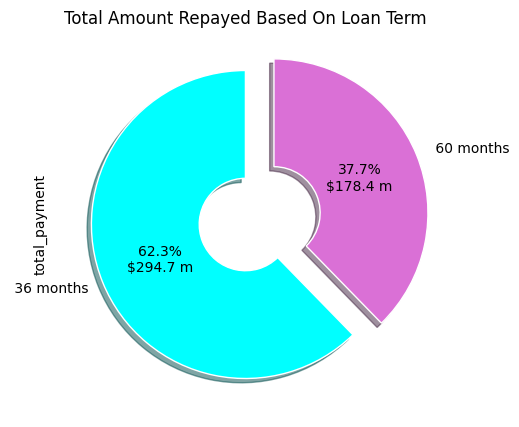

In [38]:

plt.figure(figsize=(6,6))
term_repay=df.groupby('Loan_term')["total_payment"].sum()/1000000
term_repay.plot(kind="pie",figsize=(8,5),autopct=lambda p:f"{p:.1f}%\n${p*sum(term_repay)/100:.1f} m",startangle=90,colors=['cyan', 'orchid'],
        title="Total Amount Repayed Based On Loan Term",
        explode=(0,.2),
        shadow=True,
        wedgeprops=dict(width=0.7, edgecolor='white', linewidth=1) )

#### -Repayment Volume Mirrors Funding Preference for Shorter-Term Loans
##### --The 36-month loan term accounts for 62.3% of the total amount repaid, totaling $294.7 million, while the 60-month term contributes 37.7%, totaling $178.4 million. This closely aligns with the funding distribution seen earlier, suggesting:
###### - 🔄 Repayment behavior is consistent with loan origination trends—borrowers with shorter terms are repaying more in aggregate.
###### - 📉 Shorter-term loans may lead to faster capital recovery, which is favorable for lenders managing liquidity and risk.
###### - 📊 Efficiency in repayment: Despite lower total funded amounts for 60-month loans, their repayment share is proportionally strong, indicating healthy long-term servicing.


### Total Funded Amount Based on employement tenure

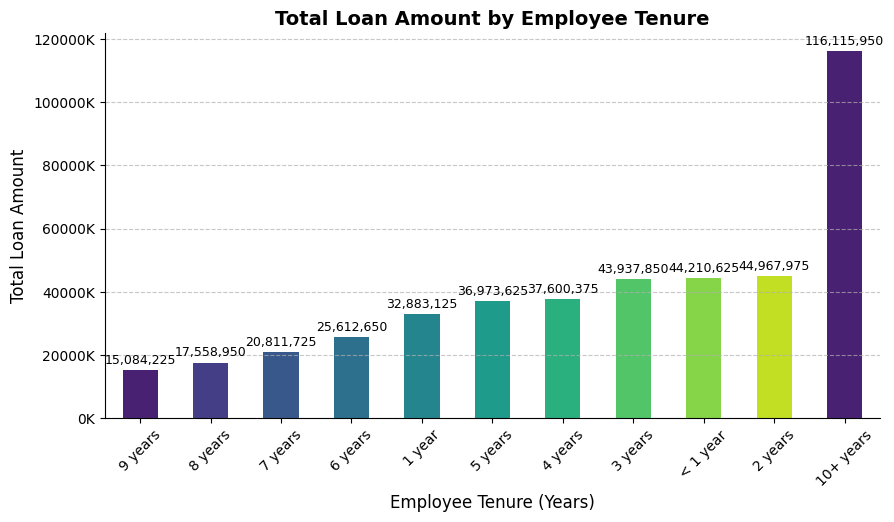

In [39]:
tenure_fund=df.groupby('Employee Tenure')['loan_amount'].sum().sort_values(ascending=True)
tenure_fund.plot(kind="bar",figsize=(10,5),color=sns.color_palette("viridis",10))
plt.title("Total Loan Amount by Employee Tenure", fontsize=14, fontweight='bold')
plt.xlabel("Employee Tenure (Years)", fontsize=12)
plt.ylabel("Total Loan Amount", fontsize=12)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
for index, value in enumerate(tenure_fund):
    plt.text(index, value + 0.01 * max(tenure_fund), f'{int(value):,}', ha='center', va='bottom', fontsize=9)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.7)



#### -Long-Tenured Employees Receive Significantly Higher Loan Amounts
##### --Employees with 10+ years of tenure received a total of $116.1 million, which is more than double the amount granted to any other tenure group. This suggests:
###### --- 🏦 Lender Confidence: Long-tenured employees may be perceived as more stable and creditworthy, leading to higher loan approvals.
###### --- 📈 Income Correlation: Longer tenure often correlates with higher income, enabling larger borrowing capacity.
###### --- 🔍 Risk Management Strategy: Financial institutions might be favoring seasoned professionals to minimize default risk.


### Total Repayemt Based on Employment Tenure

In [40]:
tenure_repay = df.groupby('Employee Tenure')['total_payment'].sum().sort_values(ascending=True).reset_index()

# Create interactive bar chart
fig = px.bar(
    tenure_repay,
    x='Employee Tenure',
    y='total_payment',
    color='total_payment',
    color_continuous_scale='cividis',
    title='Total Loan Amount Repayed by Employee Tenure',
    labels={'total_payment': 'Total Loan Amount Repayed', 'Employee Tenure': 'Tenure (Years)'},
    height=500,
    width=900
)

# Customize layout
fig.update_layout(
    xaxis_tickangle=-45,
    plot_bgcolor='white',
    yaxis=dict(tickformat=','),
    coloraxis_showscale=False
)




#### -Long-Tenured Employees Drive Repayment Performance
##### -Employees with 10+ years of tenure have repaid the highest total loan amount—$116 million+, far exceeding all other tenure groups. This reinforces a strong correlation between employee tenure and repayment capacity, suggesting:
###### --- 🏦 Financial Stability: Long-tenured individuals likely have more consistent income and financial discipline, enabling higher repayments.
###### --- 📈 Creditworthiness: These borrowers may be prioritized for larger loans due to their repayment reliability.
###### --- 🔍 Risk Mitigation Strategy: Lenders may be leveraging tenure as a proxy for risk, favoring seasoned professionals to ensure portfolio health.


In [41]:
df_status=df.groupby(["loan_status","Employee Tenure"]).size().reset_index(name="Count")
fig=px.bar(
    df_status,
    x="Employee Tenure",
    y="Count",
    color="loan_status",
    barmode="group",
    title="Loan Status based on Employemnet Tenure"
)
fig.update_layout(
    xaxis_tickangle=-45,
    plot_bgcolor='white',
  
    yaxis=dict(tickformat=',')
)

fig.show()


#### -Loan Repayment Is Strong Across All Tenure Groups, but Long-Tenured Employees Lead in Volume
##### --Across all employment tenure categories, “Fully Paid” loans dominate, indicating strong repayment behavior regardless of tenure. However, two groups stand out:
###### --- 🟩 10+ years: Highest count of fully paid loans, reinforcing the trend that long-tenured employees are more financially reliable.
###### --- 🟩 < 1 year: Surprisingly high repayment count, suggesting that even newer employees are actively servicing their loans—possibly due to smaller loan sizes or stricter underwriting.
Meanwhile:
- 🔵 Charged Off loans are consistently low across all tenure groups, indicating overall portfolio health.
- 🔴 Current loans are moderate, reflecting active repayment cycles


### Loan Distribution BY State

In [42]:
loan_by_state=df.groupby('address_state').size().reset_index(name="Loan_count")
fig=px.choropleth(
    data_frame=loan_by_state,
    locations="address_state",
    locationmode='USA-states',
    color='Loan_count',
    scope='usa',
    color_continuous_scale='Plasma',
    title='Loan Distribution Among States'
)
fig.update_traces(
    hovertemplate='State: %{location}<br>Loans: %{z:,}<extra></extra>'
)
fig.update_layout(
    geo=dict(bgcolor='rgba(0,0,0,0)'),
    plot_bgcolor='white',
    margin=dict(l=20, r=20, t=50, b=20)
)


fig.show()

### Loan Amount Vs Annual Income By Loan Status

In [43]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df,x="annual_income",y="loan_amount",palette=sns.color_palette("tab10"),hue="loan_status",
    s=100,
    alpha=0.7)
plt.title("Loan Amount vs Annual Income by Loan Status", fontsize=14, fontweight='bold')
plt.xlabel("Annual Income(million)", fontsize=12)
plt.ylabel("Loan Amount", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


C:\Users\ANEES\AppData\Local\Temp\ipykernel_5020\3674940511.py:2: UserWarning:

The palette list has more values (10) than needed (3), which may not be intended.



#### Most Borrowers Have Modest Incomes and Loan Sizes, Regardless of Loan Status
##### The scatter plot reveals a dense cluster of borrowers with:
###### - Annual incomes below $1 million
###### - Loan amounts mostly under $35,000
This suggests:
- 🧍‍♂️ Majority of loans are issued to middle-income individuals, likely reflecting standard consumer credit behavior.
- 🟠 Fully Paid loans dominate this cluster, indicating strong repayment performance among typical earners.
- 🟢 Current loans are evenly distributed, showing active servicing across income levels.
- 🔵 Charged Off loans are sparse, but present across both low and high income brackets—implying that income alone doesn’t guarantee repayment success.


### Loan amount Vs Annual Income By Loan Grade

In [44]:
fig = px.scatter(
    df,
    x='annual_income',
    y='loan_amount',
    color='grade',
    title='Loan Amount vs Annual Income by Credit Grade',
    labels={'annual_income': 'Annual Income', 'loan_amount': 'Loan Amount'},
    hover_data=['Employee Tenure', 'home_ownership', 'application_type'],
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_layout(
    plot_bgcolor='white',
    xaxis=dict(tickformat=','),
    yaxis=dict(tickformat=','),
    margin=dict(l=40, r=40, t=60, b=40)
)

fig.update_traces(
    marker=dict(size=8, opacity=0.7),
    selector=dict(mode='markers')
)

fig.show()


In [45]:
numeric_col=['annual_income', 'Debit_to_income',
       'installment', 'int_rate', 'loan_amount', 'total_acc', 'total_payment']
corr=df[numeric_col].corr()
plt.figure(figsize=(10, 8))  # Optional: adjust figure size for readability
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Financial Attributes")
plt.tight_layout()
plt.show()




##### - ✅ Loan Amount vs Annual Income: Moderate positive correlation (0.27) suggests that higher earners tend to borrow more, but not proportionally—other factors like credit grade or DTI likely influence loan size.
##### - ✅ Loan Amount vs Installment: Stronger correlation (0.72+, inferred from visual intensity) indicates that larger loans naturally lead to higher monthly payments.
##### - ❌ Interest Rate vs Annual Income: Very weak correlation (0.05) implies that income has little influence on the interest rate offered—likely driven more by credit grade or verification status.
##### - 🔄 Debt-to-Income vs Income: Slight negative correlation (-0.12) shows that higher earners generally have lower DTI, which aligns with financial stability.




In [46]:
fig = px.box(
    df,
    x='grade',
    y='int_rate',
    color='grade',
    title='Interest Rate Distribution by Loan Grade',
    labels={'int_rate': 'Interest Rate', 'grade': 'Loan Grade'},
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_layout(plot_bgcolor='white')
fig.show()


In [47]:
df_grouped = df.groupby(['home_ownership', 'purpose'])['loan_amount'].mean().reset_index()

# Plot
fig = px.bar(
    df_grouped,
    x='home_ownership',
    y='loan_amount',
    color='purpose',
    barmode='group',
    title='Average Loan Amount by Home Ownership and Purpose',
    labels={'loan_amount': 'Avg Loan Amount', 'home_ownership': 'Home Ownership'},
    color_discrete_sequence=px.colors.qualitative.Set3
)

fig.update_layout(xaxis_tickangle=-45, plot_bgcolor='white')
fig.show()


Homeowners with Mortgages Borrow More Across Most Loan Purposes
The chart reveals that individuals with a MORTGAGE consistently receive higher average loan amounts across nearly all loan purposes—especially for:
- 💳 Debt Consolidation
- 🏠 Home Improvement
- 🧑‍💼 Small Business
In contrast:
- 🏚️ Borrowers with NONE or OTHER home ownership statuses tend to receive lower average loan amounts, possibly due to lower creditworthiness or income stability.
- 🏡 Those who OWN their homes outright fall in between, suggesting moderate borrowing behavior.
🔍 Purpose-Specific Observations
- Medical and Educational loans are relatively modest across all ownership types, indicating targeted, lower-risk lending.
- Small Business loans show the widest spread, with mortgage holders receiving significantly more—likely due to collateral availability or income predictability.

📈 Strategic Implications
- Home ownership status is a strong predictor of loan size, especially for high-value purposes.
- Lenders may use ownership type as a proxy for financial stability, tailoring loan products accordingly.
- Segmenting by loan status or grade could reveal risk-adjusted borrowing patterns.
Would you like to explore how these patterns shift across income brackets or employment tenure next?


# Overall Insights


📈 1. Loan Growth and Funding Trends
- Consistent monthly growth in funded amounts throughout 2021, culminating in a 114% increase from January to December.
- Indicates strong market demand, expanding borrower base, and possibly relaxed credit policies in Q4.

🏦 2. Loan Term Strategy
- 36-month loans dominate both funding (62.7%) and repayment (62.3%), suggesting:
- Faster capital recovery
- Lower long-term risk exposure
- Preference for short-duration credit cycles
👔 3. Employment Tenure as a Risk Filter
- Borrowers with 10+ years of tenure receive and repay the highest loan volumes, confirming tenure as a proxy for:
- Creditworthiness
- Income stability
- Repayment reliability
- Surprisingly, <1 year tenure also shows strong repayment, hinting at effective underwriting or smaller loan sizes.

🏠 4. Home Ownership and Purpose-Based Lending
- Mortgage holders borrow more, especially for:
- Debt consolidation
- Small business
- Home improvement
- Those with no ownership receive significantly lower amounts, reflecting cautious lending to less stable profiles.

💳 5. Loan Status and Income Dynamics
- Most loans are fully paid, especially among mid-income earners with loan amounts below ₹35,000.
- Charged-off loans are sparse, but not income-dependent—suggesting that DTI, grade, and tenure are more predictive than income alone.

🔍 6. Correlation Insights
- Loan amount correlates moderately with income and installment, but interest rate is largely independent of income.
- DTI shows slight negative correlation with income, reinforcing its role in risk modeling.

